#### Making sure we are using the correct env

In [2]:
import sys
sys.executable

'/Users/ludovic/.local/share/virtualenvs/kaggle_disaster_tweets-xv3ee1E-/bin/python'

## 1) Data visualisation

In [3]:
import pandas
data = pandas.read_csv("../data/train.csv")
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
import matplotlib.pyplot as plt

### Target feature

In [5]:
data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

### Location and Keyword features

In [6]:
import matplotlib
import seaborn as sns

<AxesSubplot:>

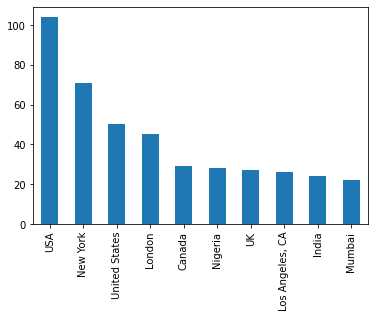

In [7]:
data['location'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

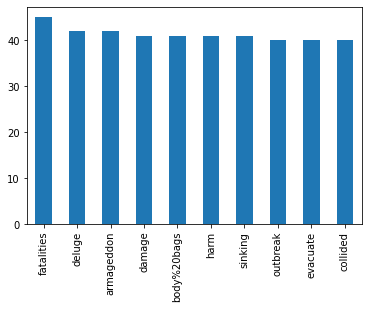

In [8]:
data['keyword'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

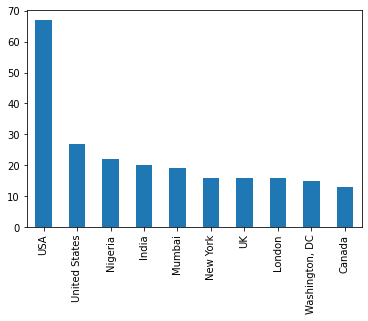

In [9]:
data[data['target']==1]['location'].value_counts()[:10].plot(kind='bar')

### Text feature

#### Word count

In [10]:
def wl(text):
    return len(text.split(" "))
data['word_length']=data['text'].apply(wl)

<AxesSubplot:>

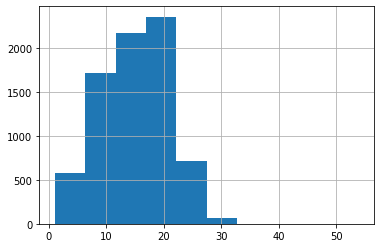

In [11]:
data['word_length'].hist()

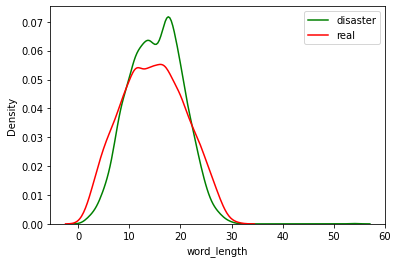

In [12]:
sns.kdeplot(data[data['target']==1]['word_length'],color='g')
sns.kdeplot(data[data['target']==0]['word_length'],color='r')
plt.legend(['disaster','real'])

#### character count

<AxesSubplot:>

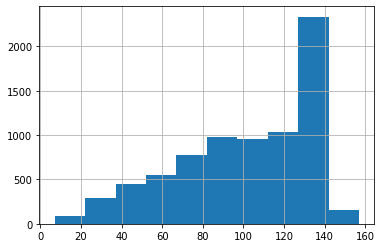

In [13]:
data['char_length']=data['text'].apply(len)
data['char_length'].hist()

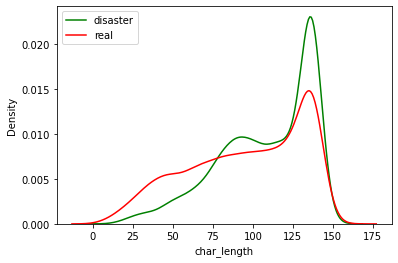

In [14]:
sns.kdeplot(data[data['target']==1]['char_length'],color='g')
sns.kdeplot(data[data['target']==0]['char_length'],color='r')
plt.legend(['disaster','real'])

<AxesSubplot:xlabel='char_length', ylabel='word_length'>

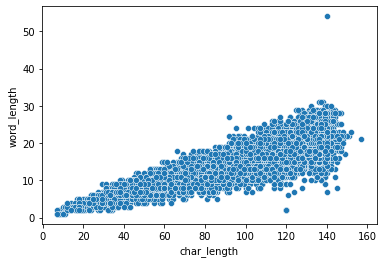

In [15]:
sns.scatterplot(x='char_length',y='word_length',data=data)

Unique words in tweets

In [16]:
data['unique_word_count'] =data['text'].apply(lambda x: len(set(str(x).split())))

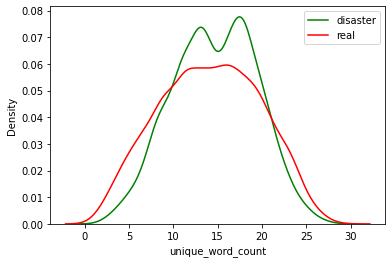

In [17]:
sns.kdeplot(data[data['target']==1]['unique_word_count'],color='g')
sns.kdeplot(data[data['target']==0]['unique_word_count'],color='r')
plt.legend(['disaster','real'])

<AxesSubplot:xlabel='char_length', ylabel='unique_word_count'>

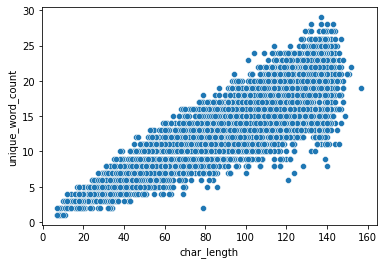

In [18]:
sns.scatterplot(x='char_length',y='unique_word_count',data=data)

Stop words count


In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ludovic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
all_stopwords = stopwords.words('english')
data['stop_words']=data['text'].apply(lambda x: len([words for words in str(x).lower().split() if words in all_stopwords]))

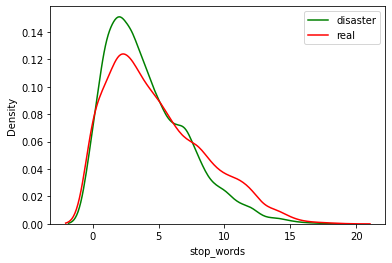

In [22]:
sns.kdeplot(data[data['target']==1]['stop_words'],color='g')
sns.kdeplot(data[data['target']==0]['stop_words'],color='r')
plt.legend(['disaster','real'])

<AxesSubplot:xlabel='target', ylabel='stop_words'>

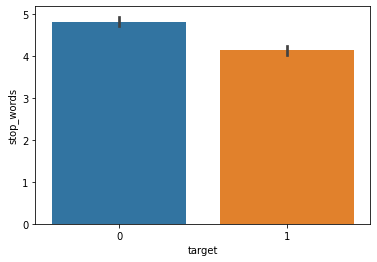

In [23]:
sns.barplot(x='target',y='stop_words',data=data)

correlation

<AxesSubplot:>

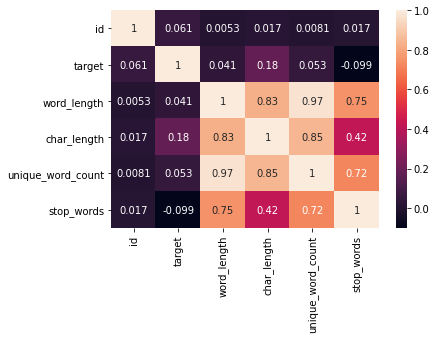

In [30]:
corr=data.corr(method='pearson')
sns.heatmap(corr,annot=True)

<AxesSubplot:>

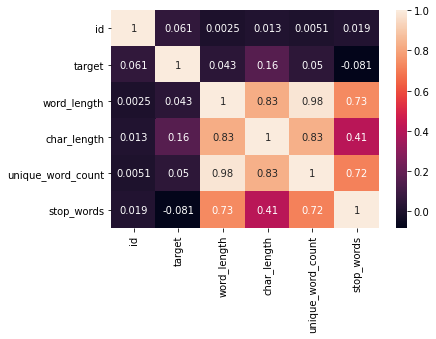

In [28]:
corr=data.corr(method='spearman')
sns.heatmap(corr,annot=True)

Positive Correlation: means that if feature A increases then feature B also increases or if feature A decreases then feature B also decreases. Both features move in tandem and they have a linear relationship.
Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results. Luckily, decision trees and boosted trees algorithms are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and you should fix it before training the model.
« En probabilités et en statistique, la corrélation entre plusieurs variables aléatoires ou statistiques est une notion de liaison qui contredit leur indépendance. « 

corrélation de Pearson. = lien linéaire
Malheureusement toutes les relations de dépendances ne sont pas forcément linéaire, et donc il va falloir pousser plus loin les régressions (polynomiale, etc.). Nous allons donc nous tourner vers la corrélation de Spearman (rho) qui évalue la relation monotone entre deux variables. Dans une relation monotone, les variables ont tendance à changer ensemble, mais pas nécessairement à un taux régulier
ACP pour reduire corrélation
Each feature of the transformed data set is a linear combination of all features of the input data set. Unfortunately, this makes the interpretation regarding the importance of each feature on the prediction result very difficult.



In [31]:
data.head()

,id,keyword,location,text,target,word_length,char_length,unique_word_count,stop_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,13,6
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,7,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133,20,11
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,65,8,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,88,15,7
